<h1>Análisando algoritmos de ordenamiento</h1>

In [3]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [2]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [3]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[1 6 3 0 9 4 8 5 7 2]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [4]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [5]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [11]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [12]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 125


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [13]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [14]:
print exper_analysis(10)

[2, 2, 8, 17, 32, 29, 53, 65, 71, 107]


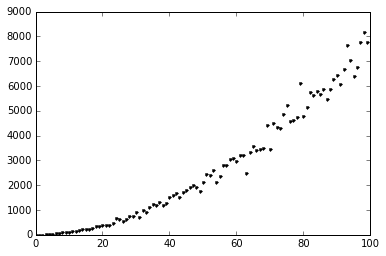

In [17]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [ ]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

<h4> ALGORTIMO QUICK SORT</h4>


In [28]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

def quickSort(alist,acct):
    acct.count()
    quickSortHelper(alist,0,len(alist)-1,acct)

def quickSortHelper(alist,first,last,acct):
   
   if first<last:
        
        splitpoint = partition(alist,first,last,acct) 
       
        quickSortHelper(alist,first,splitpoint-1,acct)
        quickSortHelper(alist,splitpoint+1,last,acct)


def partition(alist,first,last,acct):
   pivotvalue = alist[first];  acct.count()

   leftmark = first+1;  acct.count()
   rightmark = last;  acct.count()

   done = False;  acct.count()
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1; acct.count()

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1; acct.count()

       if rightmark < leftmark: 
           done = True; acct.count()
       else:
           temp = alist[leftmark]; acct.count()
           alist[leftmark] = alist[rightmark]; acct.count()
           alist[rightmark] = temp; acct.count()

   temp = alist[first]; acct.count()
   alist[first] = alist[rightmark]; acct.count()
   alist[rightmark] = temp; acct.count()


   return rightmark



In [21]:
alist = np.random.permutation(range(0,15))
print (alist)
acct = Counter()
quickSort(alist,acct)
acct.print_steps()
print(alist)


[ 0  6  3  7  2 12  4  5 13  8  9 11  1 10 14]
Number of steps = 134
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


<h4> Análisis Experimental</h4>


In [25]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        quickSort(l, acct)
        results.append(acct.steps)
    return results

In [26]:
print exper_analysis(10)

[1, 1, 10, 20, 24, 29, 47, 50, 68, 77]


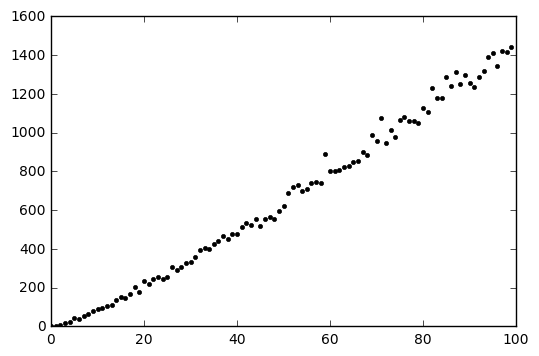

In [27]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h4> ALGORTIMO DE MEZCLAS </h4>

In [52]:
function mergesort(m)
   var list left, right, result
   if length(m) ≤ 1
       return m
   else
       var middle = length(m) / 2
       for each x in m up to middle - 1
           add x to left
       for each x in m at and after middle
           add x to right
       left = mergesort(left)
       right = mergesort(right)
       if last(left) ≤ first(right) 
          append right to left
          return left
       result = merge(left, right)
       return result

function merge(left,right)
   var list result
   while length(left) > 0 and length(right) > 0
       if first(left) ≤ first(right)
           append first(left) to result
           left = rest(left)
       else
           append first(right) to result
           right = rest(right)
   if length(left) > 0 
       append rest(left) to result
   if length(right) > 0 
       append rest(right) to result
   return result

SyntaxError: invalid syntax (<ipython-input-52-d327e12e6803>, line 1)

In [49]:
actual = np.random.permutation(range(0,14))
print (numbers)
acct = Counter()

test(actual)
print(alist)



[13  7  4  9 11  5  1 12 10  6  3  8  2  0]
[ 8  3  9  2 12  1 14  4 10  5  7 13  6 11  0]
